In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('../tools/utils/rxrx1-utils')
import rxrx.io as rio

In [2]:
ls ../mnt/inputs/origin/

pixel_stats.csv.zip            test_controls.csv  train_controls.csv
recursion_dataset_license.pdf  test.csv           train.csv.zip
sample_submission.csv          test.zip           train.zip


## origin の確認

In [3]:
DATA_PATH = '../mnt/inputs/origin/'

In [4]:
# train.csv
train_csv_df = pd.read_csv(DATA_PATH + 'train.csv.zip')
display(train_csv_df.shape, train_csv_df.head())

(36515, 5)

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144


In [5]:
# train_controls
train_controles_df = pd.read_csv(DATA_PATH + 'train_controls.csv')
display(train_controles_df.shape, train_controles_df.head())

(4097, 6)

,id_code,experiment,plate,well,sirna,well_type
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1138,negative_control
1,HEPG2-01_1_C03,HEPG2-01,1,C03,1109,positive_control
2,HEPG2-01_1_C07,HEPG2-01,1,C07,1121,positive_control
3,HEPG2-01_1_C11,HEPG2-01,1,C11,1126,positive_control
4,HEPG2-01_1_C15,HEPG2-01,1,C15,1118,positive_control


In [6]:
# test_controls
test_controles_df = pd.read_csv(DATA_PATH + 'test_controls.csv')
display(test_controles_df.shape, test_controles_df.head())

(2246, 6)

,id_code,experiment,plate,well,sirna,well_type
0,HEPG2-08_1_B02,HEPG2-08,1,B02,1138,negative_control
1,HEPG2-08_1_C03,HEPG2-08,1,C03,1137,positive_control
2,HEPG2-08_1_C07,HEPG2-08,1,C07,1120,positive_control
3,HEPG2-08_1_C11,HEPG2-08,1,C11,1108,positive_control
4,HEPG2-08_1_C15,HEPG2-08,1,C15,1113,positive_control


In [7]:
# pixel_stats
pixel_stats_df = pd.read_csv(DATA_PATH + 'pixel_stats.csv.zip')
display(pixel_stats_df.shape, pixel_stats_df.head())

(753060, 11)

,id_code,experiment,plate,well,site,channel,mean,std,median,min,max
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1,1,71.063782,43.146240,67.0,7,255
1,HEPG2-01_1_B02,HEPG2-01,1,B02,1,2,32.174431,9.384594,31.0,6,98
2,HEPG2-01_1_B02,HEPG2-01,1,B02,1,3,61.836025,23.377997,59.0,11,255
3,HEPG2-01_1_B02,HEPG2-01,1,B02,1,4,56.983257,16.011435,56.0,11,156
4,HEPG2-01_1_B02,HEPG2-01,1,B02,1,5,91.671993,39.221836,85.0,13,255


In [8]:
# sample_submission
sample_submission_df = pd.read_csv(DATA_PATH + 'sample_submission.csv')
display(sample_submission_df.shape, sample_submission_df.head())

(19897, 2)

,id_code,sirna
0,HEPG2-08_1_B03,911
1,HEPG2-08_1_B04,911
2,HEPG2-08_1_B05,911
3,HEPG2-08_1_B06,911
4,HEPG2-08_1_B07,911


## check images (based on the [kernel](https://www.kaggle.com/jesucristo/quick-visualization-eda))

In [47]:
t = rio.load_site('train', 'RPE-05', 3, 'D19', 2)
# t = rio.load_site('train', 'RPE-05', 3, 'D19', 2, base_path='../mnt/inputs/')
t.shape

(512, 512, 6)

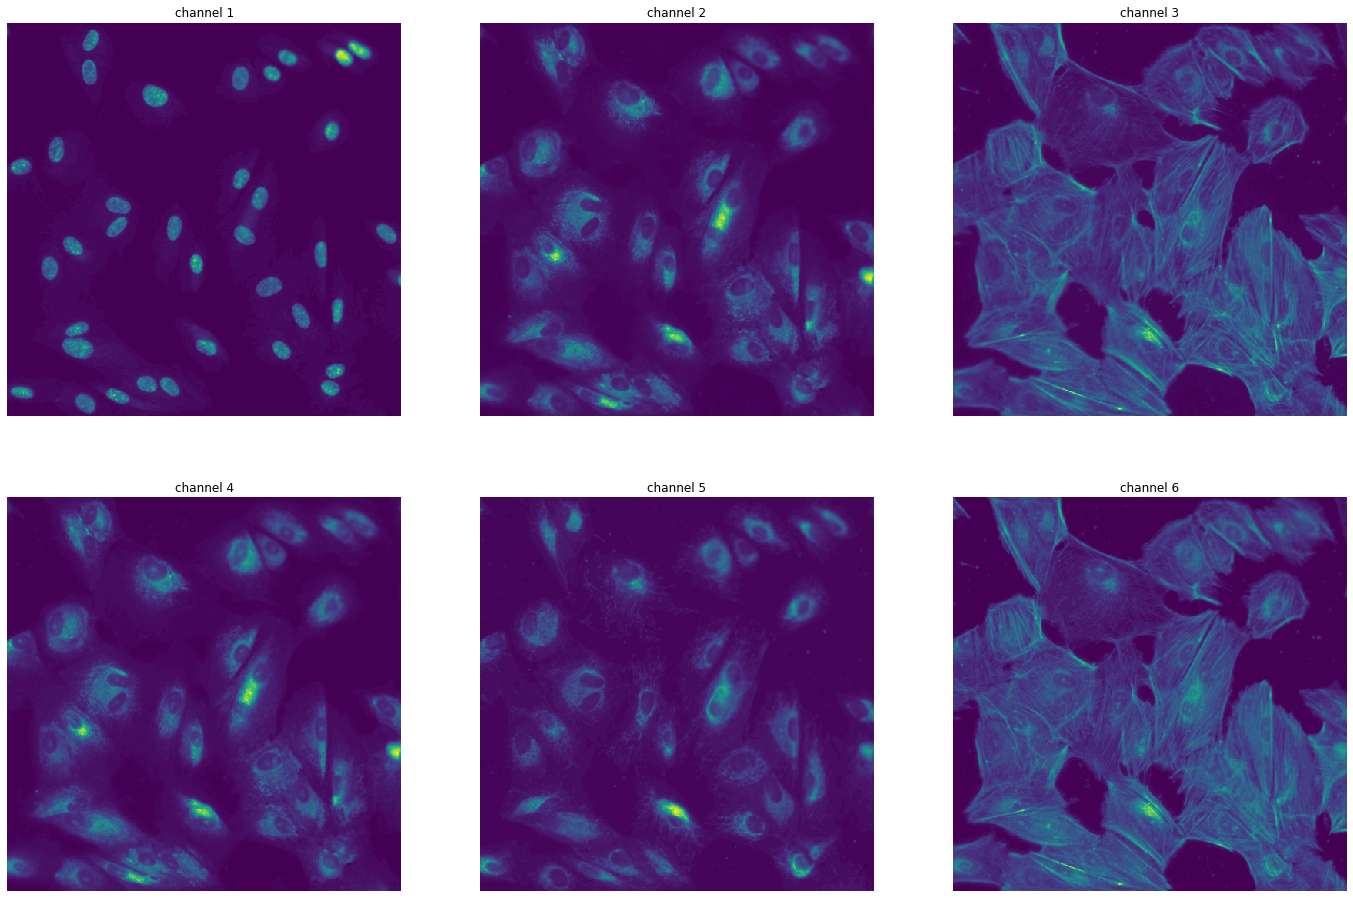

In [14]:
# channel 毎に描画してみる
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    ax.set_title('channel {}'.format(i + 1))
    # _ = ax.imshow(t[:, :, i], cmap='gray')
    _ = ax.imshow(t[:, :, i])

(512, 512, 3)


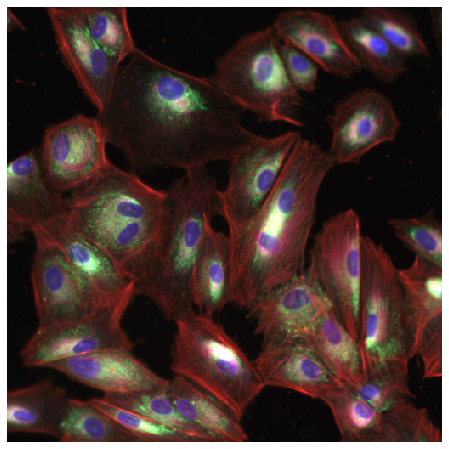

In [49]:
# 6 channel を 1 RGB image とすることで描画する関数
x = rio.convert_tensor_to_rgb(t)
print(x.shape)

plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(x)

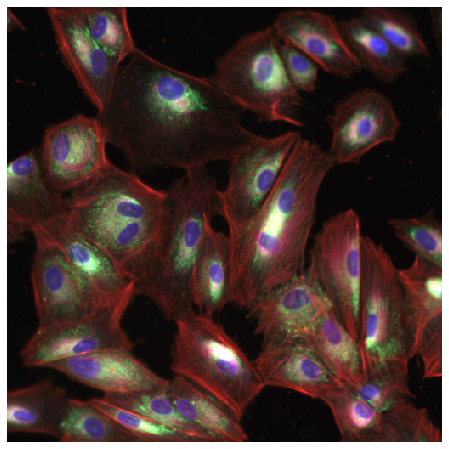

In [50]:
# 上記を一括でやってくれる function も存在
y = rio.load_site_as_rgb('train', 'RPE-05', 3, 'D19', 2)

plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(y)

## meta data を扱ってみる

In [4]:
md = rio.combine_metadata()
md.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment


In [5]:
md.experiment.value_counts()

HUVEC-02    2464
HUVEC-07    2464
HUVEC-09    2464
HEPG2-06    2464
HEPG2-09    2464
HUVEC-19    2464
HUVEC-21    2464
RPE-08      2464
RPE-07      2464
HUVEC-17    2464
RPE-02      2464
RPE-05      2464
HEPG2-04    2464
HEPG2-03    2464
HUVEC-16    2464
HUVEC-22    2464
U2OS-03     2464
HEPG2-05    2464
HEPG2-02    2464
HUVEC-12    2464
HEPG2-01    2464
HUVEC-20    2464
HUVEC-01    2464
RPE-06      2464
U2OS-01     2464
RPE-10      2464
U2OS-02     2464
U2OS-04     2464
HUVEC-05    2464
HUVEC-08    2464
HUVEC-24    2464
HUVEC-10    2464
HUVEC-11    2464
HUVEC-03    2464
HEPG2-10    2464
RPE-01      2464
HUVEC-04    2464
RPE-03      2464
HUVEC-06    2462
HUVEC-23    2462
RPE-04      2462
HUVEC-18    2462
HEPG2-08    2462
RPE-09      2462
HEPG2-11    2460
HEPG2-07    2460
HUVEC-13    2448
U2OS-05     2440
RPE-11      2434
HUVEC-14    2432
HUVEC-15    2432
Name: experiment, dtype: int64

In [54]:
md.query('dataset == "test"').dropna().sirna.value_counts()

1138.0    186
1135.0    144
1115.0    144
1124.0    144
1117.0    144
1137.0    144
1126.0    144
1119.0    144
1123.0    144
1112.0    144
1108.0    144
1109.0    144
1121.0    144
1110.0    144
1128.0    144
1132.0    144
1125.0    144
1118.0    144
1130.0    144
1131.0    144
1127.0    144
1116.0    144
1133.0    144
1134.0    144
1136.0    144
1129.0    144
1120.0    144
1114.0    142
1113.0    140
1111.0    140
1122.0    140
Name: sirna, dtype: int64